In [7]:
import pandas as pd

# Pour Excel
# pip install xlrd
import xlrd

# Pour JSON (optionnel, pour la culture)
# pip install requests
# import requests

## Option Excel

In [8]:
df = pd.read_excel('data/parking.xls', sheet_name='parking') # car la feuille s'appelle 'parking'

# /!\ Attention, le fichier Excel peut comporter plusieurs feuilles, il faut souvent préciser laquelle on veut lire
# Exemple, la feuille nommée 'Feuil1'
# df = pd.read_excel('data/parking.xls', sheet_name='Feuil1')

df

,FID,objectid,id,nom,adresse,ville,code_insee,etat,txt_aff,nbr_total,nbr_libre,dtdate,longitude,latitude,geom
0,parking.1,1,LIL0001,République,Place de la République,LILLE,59350.0,OUVERT,130,230,132,2024-12-13 08:58:00,3.062724,50.631027,POINT (704445.415162425 7059340.51105423)
1,parking.2,2,LIL0002,Plaza,Rue Nationale,LILLE,59350.0,OUVERT,75,323,78,2024-12-13 08:58:00,3.058334,50.635122,POINT (704133.963793847 7059796.51216545)
2,parking.3,3,LIL0003,Tanneurs,Rue du Molinel,LILLE,59350.0,OUVERT,315,563,318,2024-12-13 08:58:00,3.067235,50.634257,POINT (704764.808824554 7059700.63733614)
3,parking.4,4,LIL0004,Grand Palais,Boulevard des Citées Unies,LILLE,59350.0,OUVERT,840,1182,841,2024-12-13 08:58:00,3.078601,50.631481,POINT (705570.611236071 7059392.02250099)
4,parking.5,5,LIL0005,Lille Flandres,Rue de Tournai,LILLE,59350.0,OUVERT,85,374,86,2024-12-13 08:58:00,3.072433,50.634836,POINT (705133.104322689 7059765.5372206)
5,parking.6,6,LIL0006,EuraLille Centre Commercial,164 Avenue Willy Brandt,LILLE,59350.0,OUVERT,1505,2873,1507,2024-12-13 08:58:00,3.073071,50.636803,POINT (705178.14847327 7059984.74452263)
6,parking.7,7,LIL0007,Euralille Gare B,Boulevard de Turin,LILLE,59350.0,OUVERT,65,160,69,2024-12-13 08:58:00,3.076680,50.638789,POINT (705433.663402966 7060206.22105141)
7,parking.8,8,LIL0008,Euralille Gare A,Avenue de Cologne,LILLE,59350.0,OUVERT,480,600,482,2024-12-13 08:58:00,3.075970,50.639770,POINT (705383.286569579 7060315.48431841)
8,parking.9,9,LIL0009,Opéra,Avenue Carnot,LILLE,59350.0,OUVERT,195,450,198,2024-12-13 08:58:00,3.066548,50.639305,POINT (704715.680065867 7060263.06518096)
9,parking.10,10,LIL0010,Vieux Lille,Avenue du Peuple Belge,LILLE,59350.0,OUVERT,60,246,63,2024-12-13 08:58:00,3.064070,50.641600,POINT (704539.81499435 7060518.69357201)


## Option JSON
### Optionel, pour la culture/connaissance : récupérer les données en temps réel au format JSON depuis une API.

In [ ]:
url = 'https://data.lillemetropole.fr/geoserver/wfs?SERVICE=WFS&REQUEST=GetFeature&VERSION=2.0.0&TYPENAMES=mel_mobilite_et_transport%3Aparking&OUTPUTFORMAT=application%2Fjson'

response = requests.get(url)
import json

data = json.loads(response.text)
# print json with identation
print(json.dumps(data, indent=4))

# Analyse rapide Depuis le fichier .xls:

In [9]:
df = pd.read_excel('data/parking.xls', sheet_name='parking') # car la feuille s'appelle 'parking'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FID         29 non-null     object        
 1   objectid    29 non-null     int64         
 2   id          29 non-null     object        
 3   nom         29 non-null     object        
 4   adresse     29 non-null     object        
 5   ville       29 non-null     object        
 6   code_insee  26 non-null     float64       
 7   etat        29 non-null     object        
 8   txt_aff     29 non-null     object        
 9   nbr_total   29 non-null     int64         
 10  nbr_libre   29 non-null     int64         
 11  dtdate      29 non-null     datetime64[ns]
 12  longitude   29 non-null     float64       
 13  latitude    29 non-null     float64       
 14  geom        29 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 3.5+ KB


In [10]:
# Colonnes d'intérêt :
cols = ['id', 'nom', 'ville', 'etat', 'nbr_total', 'nbr_libre']

df[cols]

,id,nom,ville,etat,nbr_total,nbr_libre
0,LIL0001,République,LILLE,OUVERT,230,132
1,LIL0002,Plaza,LILLE,OUVERT,323,78
2,LIL0003,Tanneurs,LILLE,OUVERT,563,318
3,LIL0004,Grand Palais,LILLE,OUVERT,1182,841
4,LIL0005,Lille Flandres,LILLE,OUVERT,374,86
5,LIL0006,EuraLille Centre Commercial,LILLE,OUVERT,2873,1507
6,LIL0007,Euralille Gare B,LILLE,OUVERT,160,69
7,LIL0008,Euralille Gare A,LILLE,OUVERT,600,482
8,LIL0009,Opéra,LILLE,OUVERT,450,198
9,LIL0010,Vieux Lille,LILLE,OUVERT,246,63


# Question : Donner un histogramme de l'occupation des parkings de la MEL.

### Calcul du nombre de places occupées


In [35]:
# df['nbr_occupe'] = df['nbr_total'] - df['nbr_libre']
df.loc[:, 'nbr_occupe'] = df['nbr_total'] - df['nbr_libre']
df.head()

,FID,objectid,id,nom,adresse,ville,code_insee,etat,txt_aff,nbr_total,nbr_libre,dtdate,longitude,latitude,geom,nbr_occupe
0,parking.1,1,LIL0001,République,Place de la République,LILLE,59350.0,OUVERT,130,230,132,2024-12-13 08:58:00,3.062724,50.631027,POINT (704445.415162425 7059340.51105423),98
1,parking.2,2,LIL0002,Plaza,Rue Nationale,LILLE,59350.0,OUVERT,75,323,78,2024-12-13 08:58:00,3.058334,50.635122,POINT (704133.963793847 7059796.51216545),245
2,parking.3,3,LIL0003,Tanneurs,Rue du Molinel,LILLE,59350.0,OUVERT,315,563,318,2024-12-13 08:58:00,3.067235,50.634257,POINT (704764.808824554 7059700.63733614),245
3,parking.4,4,LIL0004,Grand Palais,Boulevard des Citées Unies,LILLE,59350.0,OUVERT,840,1182,841,2024-12-13 08:58:00,3.078601,50.631481,POINT (705570.611236071 7059392.02250099),341
4,parking.5,5,LIL0005,Lille Flandres,Rue de Tournai,LILLE,59350.0,OUVERT,85,374,86,2024-12-13 08:58:00,3.072433,50.634836,POINT (705133.104322689 7059765.5372206),288


### Je choisis de filtrer les parkings ouverts


In [12]:
df = df[df['etat'] == 'OUVERT']
df

,FID,objectid,id,nom,adresse,ville,code_insee,etat,txt_aff,nbr_total,nbr_libre,dtdate,longitude,latitude,geom,nbr_occupe
0,parking.1,1,LIL0001,République,Place de la République,LILLE,59350.0,OUVERT,130,230,132,2024-12-13 08:58:00,3.062724,50.631027,POINT (704445.415162425 7059340.51105423),98
1,parking.2,2,LIL0002,Plaza,Rue Nationale,LILLE,59350.0,OUVERT,75,323,78,2024-12-13 08:58:00,3.058334,50.635122,POINT (704133.963793847 7059796.51216545),245
2,parking.3,3,LIL0003,Tanneurs,Rue du Molinel,LILLE,59350.0,OUVERT,315,563,318,2024-12-13 08:58:00,3.067235,50.634257,POINT (704764.808824554 7059700.63733614),245
3,parking.4,4,LIL0004,Grand Palais,Boulevard des Citées Unies,LILLE,59350.0,OUVERT,840,1182,841,2024-12-13 08:58:00,3.078601,50.631481,POINT (705570.611236071 7059392.02250099),341
4,parking.5,5,LIL0005,Lille Flandres,Rue de Tournai,LILLE,59350.0,OUVERT,85,374,86,2024-12-13 08:58:00,3.072433,50.634836,POINT (705133.104322689 7059765.5372206),288
5,parking.6,6,LIL0006,EuraLille Centre Commercial,164 Avenue Willy Brandt,LILLE,59350.0,OUVERT,1505,2873,1507,2024-12-13 08:58:00,3.073071,50.636803,POINT (705178.14847327 7059984.74452263),1366
6,parking.7,7,LIL0007,Euralille Gare B,Boulevard de Turin,LILLE,59350.0,OUVERT,65,160,69,2024-12-13 08:58:00,3.076680,50.638789,POINT (705433.663402966 7060206.22105141),91
7,parking.8,8,LIL0008,Euralille Gare A,Avenue de Cologne,LILLE,59350.0,OUVERT,480,600,482,2024-12-13 08:58:00,3.075970,50.639770,POINT (705383.286569579 7060315.48431841),118
8,parking.9,9,LIL0009,Opéra,Avenue Carnot,LILLE,59350.0,OUVERT,195,450,198,2024-12-13 08:58:00,3.066548,50.639305,POINT (704715.680065867 7060263.06518096),252
9,parking.10,10,LIL0010,Vieux Lille,Avenue du Peuple Belge,LILLE,59350.0,OUVERT,60,246,63,2024-12-13 08:58:00,3.064070,50.641600,POINT (704539.81499435 7060518.69357201),183


In [16]:
df.dtypes

FID                   object
objectid               int64
id                    object
nom                   object
adresse               object
ville                 object
code_insee           float64
etat                  object
txt_aff               object
nbr_total              int64
nbr_libre              int64
dtdate        datetime64[ns]
longitude            float64
latitude             float64
geom                  object
nbr_occupe             int64
dtype: object

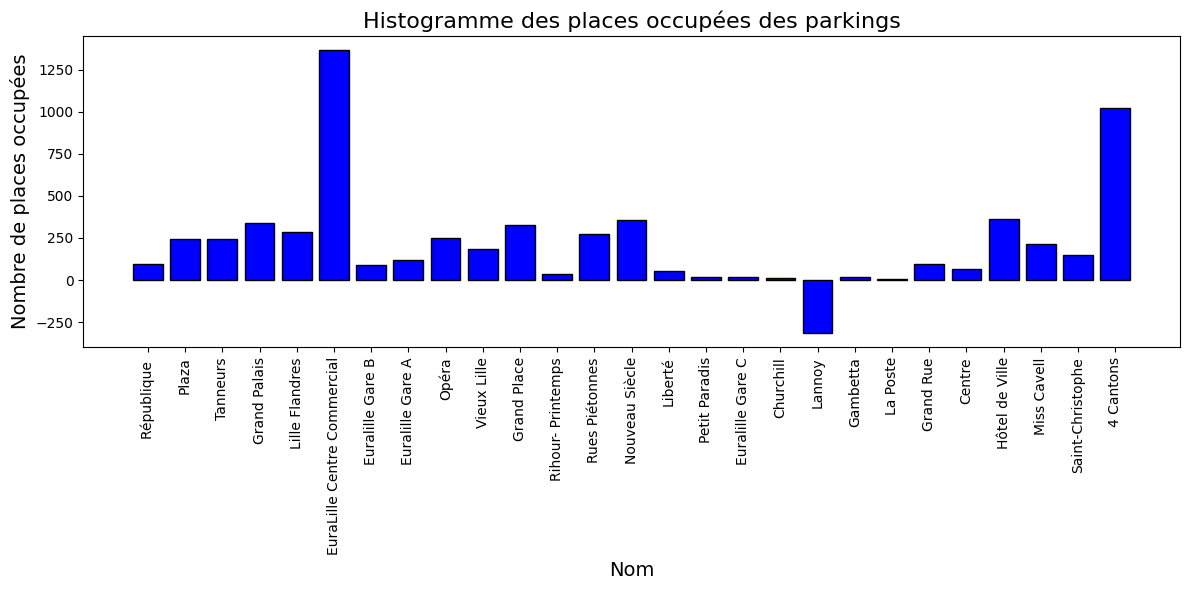

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Tracé de l'histogramme avec les noms sur l'axe x
plt.figure(figsize=(12, 6))
plt.bar(df['nom'], df['nbr_occupe'], color='blue', edgecolor='black')  # Bar chart pour associer chaque "nom" au nombre de places occupées
plt.xticks(rotation=90, fontsize=10)  # Rotation des noms pour meilleure lisibilité
plt.title('Histogramme des places occupées des parkings', fontsize=16)
plt.xlabel('Nom', fontsize=14)
plt.ylabel('Nombre de places occupées', fontsize=14)
plt.tight_layout()  # Ajuste les marges pour éviter le chevauchement
plt.show()


### On remarque un outlier pour le parking "Lannoy" qui possède un nbr_occupe négatif, ce qui est impossible
### Je choisis de supprimer les lignes où le nombre de places libres est négatif, car cela n'a pas de sens.

In [27]:
print(f'Nombre de lignes avant nettoyage : {len(df)}')   # on aurait faire df.shape[0] aussi
df = df[df['nbr_occupe'] > 0]
print(f'Nombre de lignes après nettoyage : {len(df)}')

Nombre de lignes avant nettoyage : 27
Nombre de lignes après nettoyage : 26


# Visualisation du dataset nettoyé :

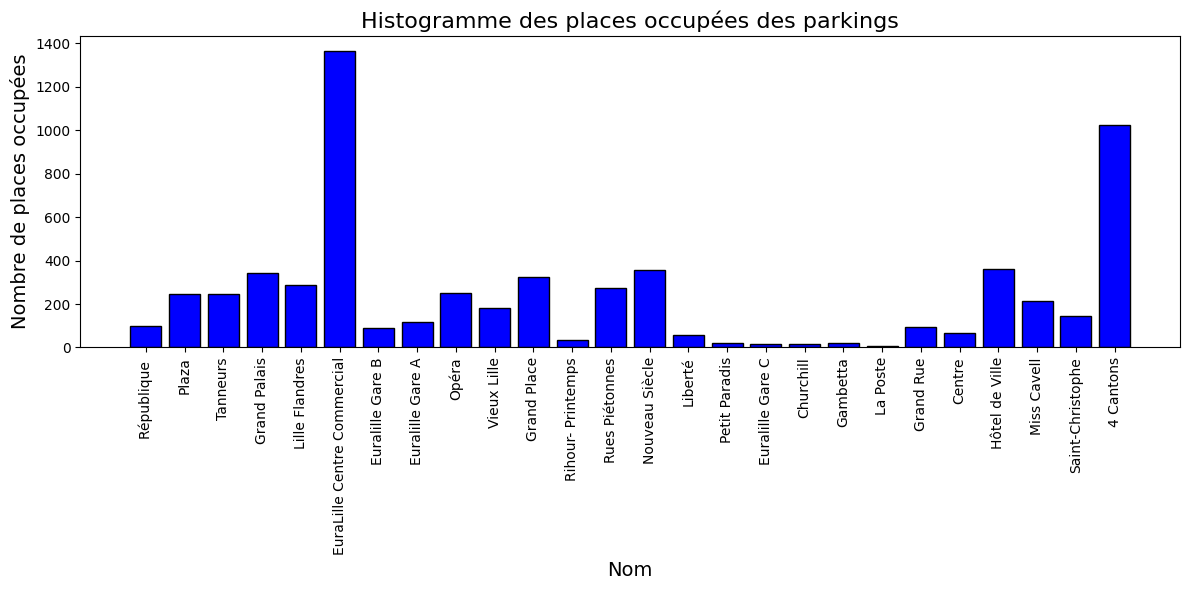

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Tracé de l'histogramme avec les noms sur l'axe x
plt.figure(figsize=(12, 6))
plt.bar(df['nom'], df['nbr_occupe'], color='blue', edgecolor='black')  # Bar chart pour associer chaque "nom" au nombre de places occupées
plt.xticks(rotation=90, fontsize=10)  # Rotation des noms pour meilleure lisibilité
plt.title('Histogramme des places occupées des parkings', fontsize=16)
plt.xlabel('Nom', fontsize=14)
plt.ylabel('Nombre de places occupées', fontsize=14)
plt.tight_layout()  # Ajuste les marges pour éviter le chevauchement
plt.show()


# Trier les parkings par places occupées en ordre décroissant

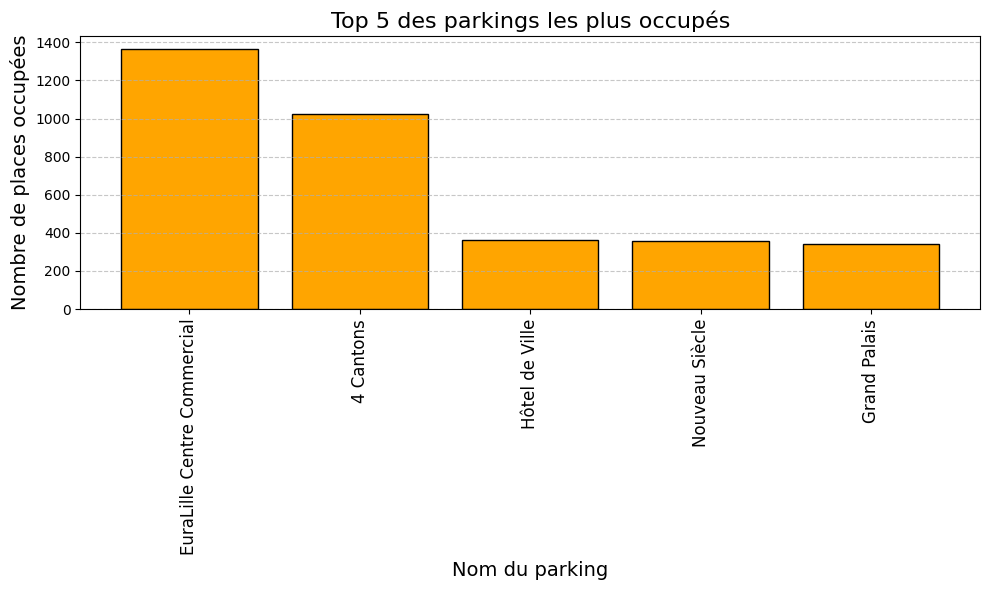

In [31]:
import matplotlib.pyplot as plt


top_5_parkings = df.sort_values(by='nbr_occupe', ascending=False).head(5)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.bar(top_5_parkings['nom'], top_5_parkings['nbr_occupe'], color='orange', edgecolor='black')
plt.title('Top 5 des parkings les plus occupés', fontsize=16)
plt.xlabel('Nom du parking', fontsize=14)
plt.ylabel('Nombre de places occupées', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotation pour mieux lire les noms
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuster les marges
plt.show()


# Effectuer une visualisation en groupant les parkings par ville.

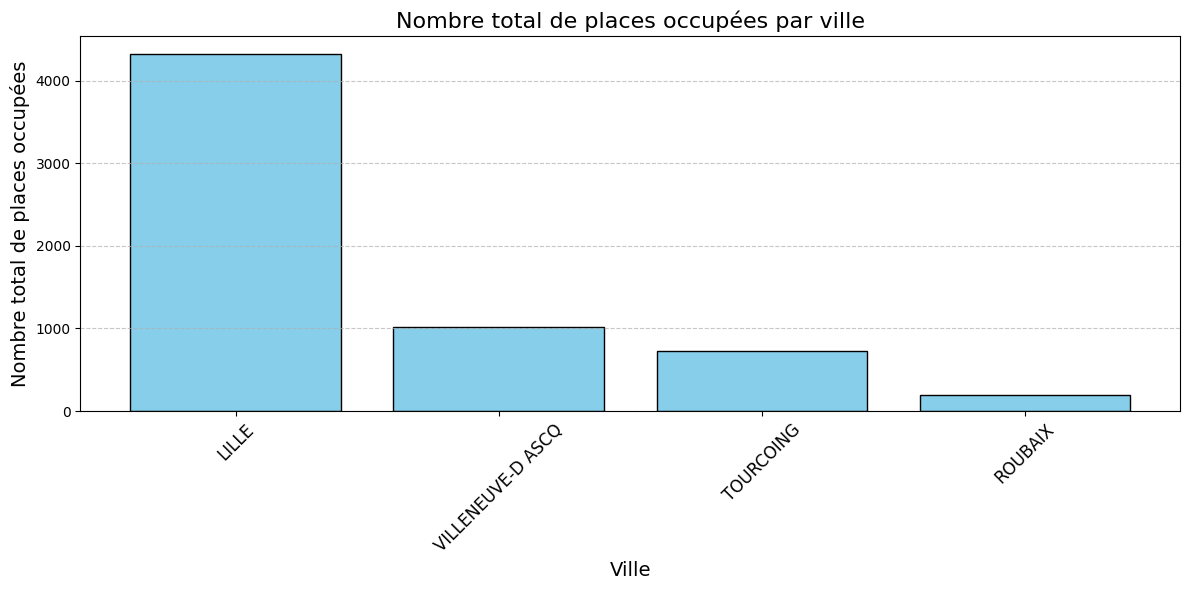

In [32]:
import matplotlib.pyplot as plt

# Grouper les données par ville et sommer les places occupées
grouped_by_ville = df.groupby('ville')['nbr_occupe'].sum().reset_index()

# Trier les villes par nombre total de places occupées (optionnel)
grouped_by_ville = grouped_by_ville.sort_values(by='nbr_occupe', ascending=False)

# Tracer le graphique
plt.figure(figsize=(12, 6))
plt.bar(grouped_by_ville['ville'], grouped_by_ville['nbr_occupe'], color='skyblue', edgecolor='black')
plt.title('Nombre total de places occupées par ville', fontsize=16)
plt.xlabel('Ville', fontsize=14)
plt.ylabel('Nombre total de places occupées', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotation pour mieux lire les noms des villes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuster les marges pour éviter le chevauchement
plt.show()


# Attention à bien  préciser dans la conclusion qu'un parking a été évincé (nbr_occupe <= 0)